In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardio_train.csv', delimiter = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(70000, 13)

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:xlabel='weight', ylabel='Density'>

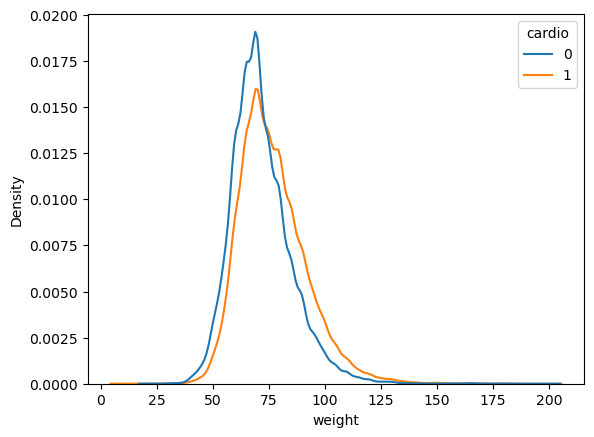

In [6]:
sns.kdeplot(df['weight'], hue = df['cardio'])

<AxesSubplot:xlabel='ap_hi', ylabel='Density'>

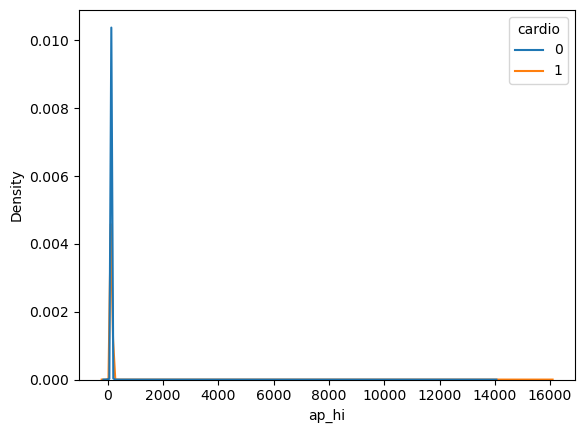

In [7]:
sns.kdeplot(df['ap_hi'], hue = df['cardio'])

<AxesSubplot:xlabel='ap_lo', ylabel='Density'>

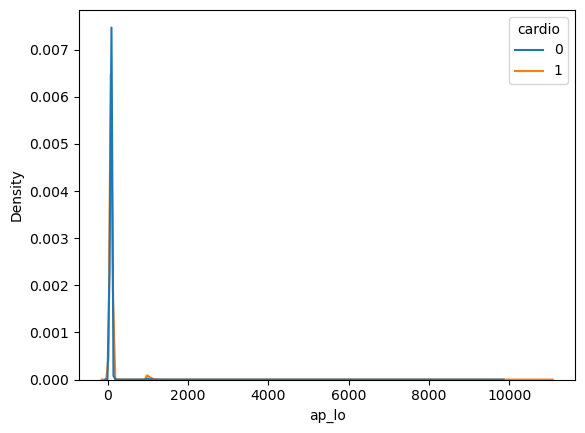

In [8]:
sns.kdeplot(df['ap_lo'], hue = df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol', ylabel='count'>

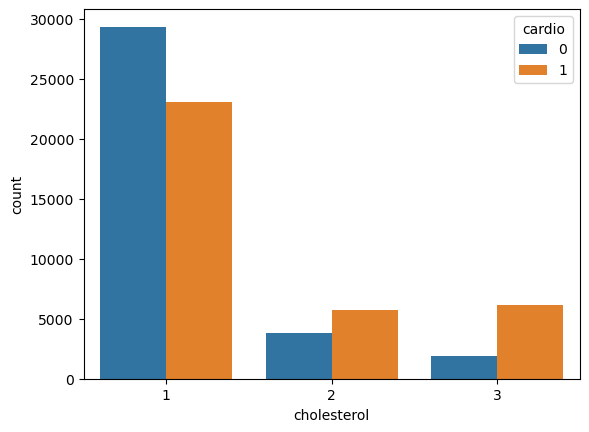

In [9]:
sns.countplot(df['cholesterol'], hue= df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gluc', ylabel='count'>

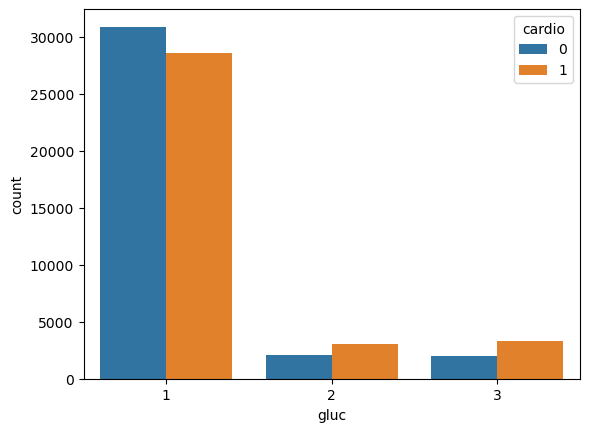

In [10]:
sns.countplot(df['gluc'], hue= df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoke', ylabel='count'>

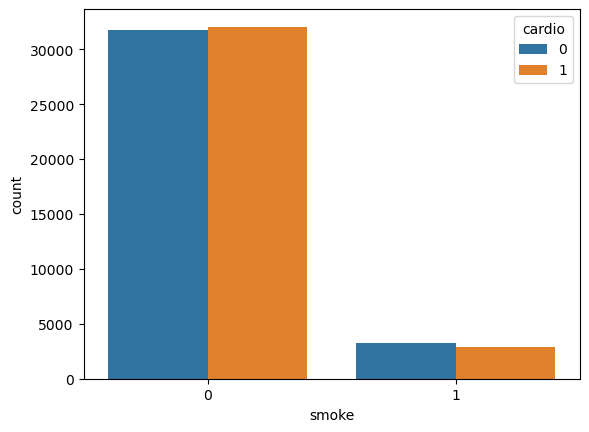

In [11]:
sns.countplot(df['smoke'], hue= df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

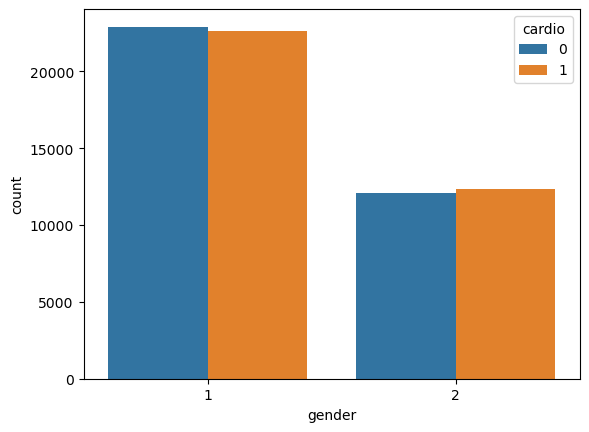

In [12]:
sns.countplot(df['gender'], hue= df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active', ylabel='count'>

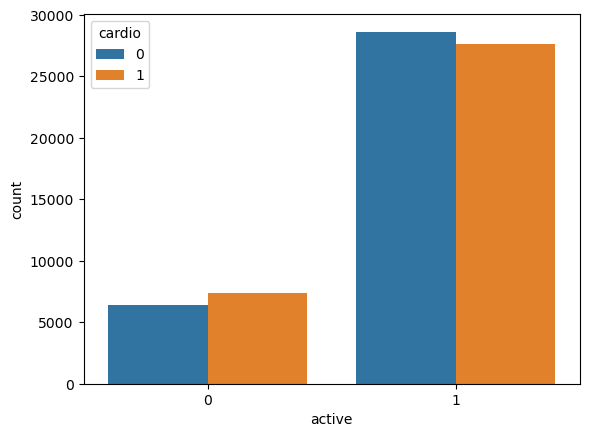

In [13]:
sns.countplot(df['active'], hue= df['cardio'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alco', ylabel='count'>

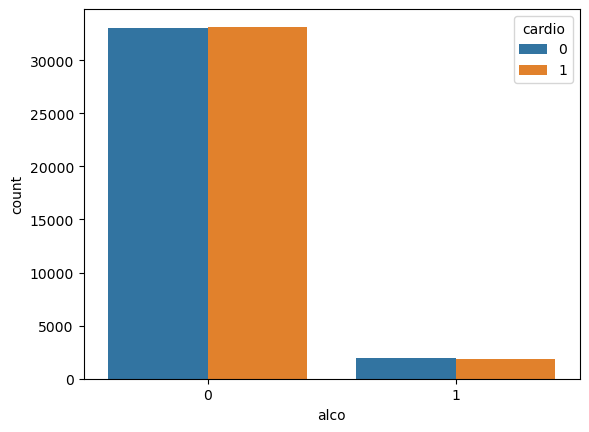

In [14]:
sns.countplot(df['alco'], hue= df['cardio'])

In [15]:
df2 = df.drop(['id', 'smoke', 'alco', 'gender'], axis = 1)

In [16]:
df2.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio
0,18393,168,62.0,110,80,1,1,1,0
1,20228,156,85.0,140,90,3,1,1,1
2,18857,165,64.0,130,70,3,1,0,1
3,17623,169,82.0,150,100,1,1,1,1
4,17474,156,56.0,100,60,1,1,0,0


In [17]:
df2['BMI'] = df2['weight'] / ((df2['height']/100) ** 2)
df2['BP_ratio'] = df2['ap_hi'] / df2['ap_lo']

In [18]:
df2_selected = df2.drop(['height','weight','ap_hi','ap_lo'], axis = 1)
df2_selected

,age,cholesterol,gluc,active,cardio,BMI,BP_ratio
0,18393,1,1,1,0,21.967120,1.375000
1,20228,3,1,1,1,34.927679,1.555556
2,18857,3,1,0,1,23.507805,1.857143
3,17623,1,1,1,1,28.710479,1.500000
4,17474,1,1,0,0,23.011177,1.666667
...,...,...,...,...,...,...,...
69995,19240,1,1,1,0,26.927438,1.500000
69996,22601,2,2,1,1,50.472681,1.555556
69997,19066,3,1,0,1,31.353579,2.000000
69998,22431,1,2,0,1,27.099251,1.687500


In [19]:
df2_selected.isnull().sum()

age            0
cholesterol    0
gluc           0
active         0
cardio         0
BMI            0
BP_ratio       0
dtype: int64

In [20]:
df2_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
df2_selected.isnull().sum()

age             0
cholesterol     0
gluc            0
active          0
cardio          0
BMI             0
BP_ratio       21
dtype: int64

In [22]:
df2_selected.dropna(axis = 0, inplace = True)

In [23]:
X = df2_selected.drop(['cardio'], axis = 1)
y = df2_selected['cardio']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 11)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
lr.score(X_test, y_test)

0.5724492712203487

In [31]:
lr.score(X_train, y_train)

0.5756456057976932

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier(random_state = 2, max_depth =13)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, random_state=2)

In [52]:
dtc.score(X_test, y_test)

0.6885776888634848

In [53]:
dtc.score(X_train, y_train)

0.7647238950699193

## REVISION

In [1]:
import numpy as np

In [2]:
a = [3, 6, 8, 2]
type(a)

list

In [3]:
arr = np.array(a)

In [4]:
arr

array([3, 6, 8, 2])

In [5]:
type(arr)

numpy.ndarray

In [6]:
b = np.array({4,5,6,2,2,1})
b

array({1, 2, 4, 5, 6}, dtype=object)

In [7]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'PCG64DXSM',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponen

In [33]:
np.random.seed?

In [32]:
np.random.seed(4)
np.random.randint(low  = 5)

2

In [38]:
np.random.seed(4)
np.random.randint(low  = 5, high = 10)

7

In [40]:
np.random.randint(low  = 5, high = 10, size = (3,5))

array([[7, 6, 7, 9, 6],
       [5, 9, 7, 9, 7],
       [9, 8, 5, 6, 5]])

In [43]:
np.random.rand(2,5)

array([[0.8662893 , 0.17316542, 0.07494859, 0.60074272, 0.16797218],
       [0.73338017, 0.40844386, 0.52790882, 0.93757158, 0.52169612]])

In [59]:
np.random.randn(1)

array([-0.99400708])

In [65]:
np.zeros(shape =(5, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [67]:
np.ones(shape = (4,))

array([1., 1., 1., 1.])

In [69]:
np.eye(2,2)

array([[1., 0.],
       [0., 1.]])

In [70]:
a = np.random.randint(5, size = (3,2))
a

array([[0, 3],
       [2, 1],
       [1, 3]])

In [71]:
np.zeros_like(a)

array([[0, 0],
       [0, 0],
       [0, 0]])

## ACCESSING ITEMS IN AN ARRAY

In [72]:
oneD = np.array([3,6,7,8,2])
twoD = np.array([[4,7,8], [2,4,7]])
threeD = np.array([[[3,5,2,1], [3,6,7,8], [1,4,3,2]], [[1,6,7,2], [2,0,9,7], [2,6,4,2]]])

In [73]:
oneD

array([3, 6, 7, 8, 2])

In [74]:
oneD[2]

7

In [75]:
twoD

array([[4, 7, 8],
       [2, 4, 7]])

In [79]:
twoD[1][1]

4

In [80]:
threeD

array([[[3, 5, 2, 1],
        [3, 6, 7, 8],
        [1, 4, 3, 2]],

       [[1, 6, 7, 2],
        [2, 0, 9, 7],
        [2, 6, 4, 2]]])

In [83]:
threeD[0][2][-1]

2

In [84]:
oneD

array([3, 6, 7, 8, 2])

In [87]:
oneD[1:4]

array([6, 7, 8])

In [88]:
twoD

array([[4, 7, 8],
       [2, 4, 7]])

In [90]:
twoD[0:2,0:2]

array([[4, 7],
       [2, 4]])

In [92]:
twoD[:, :2]

array([[4, 7],
       [2, 4]])

In [94]:
threeD[0:1, 1:, :3]

array([[[3, 6, 7],
        [1, 4, 3]]])

## ATTRIBUTES AND METHODS

In [96]:
oneD.ndim

1

In [97]:
twoD.ndim

2

In [98]:
threeD.ndim

3

In [99]:
oneD.shape

(5,)

In [100]:
twoD.shape

(2, 3)

In [101]:
threeD.shape

(2, 3, 4)

In [102]:
oneD.size

5

In [103]:
twoD.size

6

In [104]:
threeD.size

24

In [105]:
threeD.dtype

dtype('int32')

In [107]:
twoD.shape

(2, 3)

In [111]:
twoD.reshape((3,2))

array([[4, 7],
       [8, 2],
       [4, 7]])

In [109]:
twoD

array([[4, 7, 8],
       [2, 4, 7]])

In [113]:
twoD.reshape((-1, 2))

array([[4, 7],
       [8, 2],
       [4, 7]])

In [114]:
twoD

array([[4, 7, 8],
       [2, 4, 7]])

In [118]:
twoD.transpose()

array([[4, 2],
       [7, 4],
       [8, 7]])

In [119]:
oneD.sum()

26

In [120]:
oneD.mean()

5.2

In [121]:
oneD.cumsum()

array([ 3,  9, 16, 24, 26])

In [122]:
oneD

array([3, 6, 7, 8, 2])

In [123]:
twoD

array([[4, 7, 8],
       [2, 4, 7]])

In [124]:
twoD.sum()

32

In [125]:
twoD.sum(axis =0 )

array([ 6, 11, 15])

In [126]:
twoD.sum(axis = 1)

array([19, 13])

In [127]:
a = [6, 8, 9]
a + 5

TypeError: can only concatenate list (not "int") to list

In [129]:
oneD + 5

array([ 8, 11, 12, 13,  7])

In [133]:
twoD + [ 1, 3]

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [135]:
twoD>5

array([[False,  True,  True],
       [False, False,  True]])

In [136]:
twoD[twoD>5]

array([7, 8, 7])

## PANDAS

Series - 1D, single column
Dataframe - 2D, rows and column(s)

In [137]:
import pandas as pd

In [139]:
pd.Series(data = [3,6,8,7])

0    3
1    6
2    8
3    7
dtype: int64

In [141]:
pd.Series(data = [5,4,3,1], index = ['a', 'b', 'c', 'd'], name = 'numbers')

a    5
b    4
c    3
d    1
Name: numbers, dtype: int64

## INDEXING AND SLICING WITH SERIES

In [142]:
s1 = pd.Series(data = [5,4,3,1], index = ['a', 'b', 'c', 'd'], name = 'numbers')

In [143]:
s1

a    5
b    4
c    3
d    1
Name: numbers, dtype: int64

In [144]:
s1[2]

3

In [145]:
s1['c']

3

In [146]:
s1[0:2]

a    5
b    4
Name: numbers, dtype: int64

In [147]:
s1['a':'c']

a    5
b    4
c    3
Name: numbers, dtype: int64

In [149]:
s1[0:2]

a    5
b    4
Name: numbers, dtype: int64

In [150]:
s1

a    5
b    4
c    3
d    1
Name: numbers, dtype: int64

In [151]:
s1.values

array([5, 4, 3, 1], dtype=int64)

In [152]:
s1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

## DATAFRAMES

In [155]:
pd.DataFrame(data = [[3,5,6], [2,1,2], [3,2,1], [4,7,8]])

,0,1,2
0,3,5,6
1,2,1,2
2,3,2,1
3,4,7,8


In [156]:
pd.DataFrame(data = [[3,5,6], [2,1,2], [3,2,1], [4,7,8]],
             columns =['A', 'B', 'C'])

,A,B,C
0,3,5,6
1,2,1,2
2,3,2,1
3,4,7,8


In [157]:
pd.DataFrame(data = [[3,5,6], [2,1,2], [3,2,1], [4,7,8]],
             columns =['A', 'B', 'C'], index = ['a', 'b', 'c', 'd'])

,A,B,C
a,3,5,6
b,2,1,2
c,3,2,1
d,4,7,8


## ACCESSING ITEMS IN A DATAFRAME

In [192]:
df = pd.DataFrame(data = [[3,'5.6',6], [2,1.2,2], [3,2.1,1], [4,7,8]],
             columns =['A', 'B', 'C'], index = ['a', 'b', 'c', 'd'])

In [193]:
df

,A,B,C
a,3,5.6,6
b,2,1.2,2
c,3,2.1,1
d,4,7,8


In [161]:
df.B

a    5
b    1
c    2
d    7
Name: B, dtype: int64

In [162]:
df['B']

a    5
b    1
c    2
d    7
Name: B, dtype: int64

In [165]:
df[['A', 'B']]

,A,B
a,3,5
b,2,1
c,3,2
d,4,7


In [166]:
df[['B']]

,B
a,5
b,1
c,2
d,7


In [167]:
df

,A,B,C
a,3,5,6
b,2,1,2
c,3,2,1
d,4,7,8


In [168]:
df.iloc[1]

A    2
B    1
C    2
Name: b, dtype: int64

In [169]:
df.loc['b']

A    2
B    1
C    2
Name: b, dtype: int64

In [170]:
df.loc['b', 'C']

2

In [171]:
df.iloc[-1, 1]

7

In [173]:
df[['A', 'B']]

,A,B
a,3,5
b,2,1
c,3,2
d,4,7


In [178]:
df.iloc[0:2 ]

,A,B,C
a,3,5,6
b,2,1,2


In [176]:
df.loc['a':'c']

,A,B,C
a,3,5,6
b,2,1,2
c,3,2,1


In [180]:
df.loc['a':'c', ['A', 'C']]

,A,C
a,3,6
b,2,2
c,3,1


In [182]:
df.loc['a':'b', ['B']]

,B
a,5
b,1


In [183]:
df.iloc[1:3, 0:2]

,A,B
b,2,1
c,3,2


In [184]:
df.iloc[:3, 1:]

,B,C
a,5,6
b,1,2
c,2,1


In [186]:
df.loc[:, ['B', 'C']]

,B,C
a,5,6
b,1,2
c,2,1
d,7,8


In [188]:
df.head(2)

,A,B,C
a,3,5,6
b,2,1,2


In [189]:
df.tail(3)

,A,B,C
b,2,1,2
c,3,2,1
d,4,7,8


In [190]:
df.shape

(4, 3)

In [194]:
df.dtypes

A     int64
B    object
C     int64
dtype: object

In [195]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [196]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [197]:
df.values

array([[3, '5.6', 6],
       [2, 1.2, 2],
       [3, 2.1, 1],
       [4, 7, 8]], dtype=object)

In [203]:
df['B'] = df['B'].astype('float64')

In [205]:
df.dtypes

A      int64
B    float64
C      int64
dtype: object

In [206]:
df > 3

,A,B,C
a,False,True,True
b,False,False,False
c,False,False,False
d,True,True,True


In [207]:
df[df>3]

,A,B,C
a,NaN,5.6,6.0
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,4.0,7.0,8.0


In [211]:
df[(df['B']>3) & (df['A'] > 3)]

,A,B,C
d,4,7.0,8


In [212]:
df

,A,B,C
a,3,5.6,6
b,2,1.2,2
c,3,2.1,1
d,4,7.0,8


In [213]:
df['D'] = [5,9,1, 2]

In [214]:
df

,A,B,C,D
a,3,5.6,6,5
b,2,1.2,2,9
c,3,2.1,1,1
d,4,7.0,8,2


In [215]:
df['A'] = df['A'] * 2

In [216]:
df

,A,B,C,D
a,6,5.6,6,5
b,4,1.2,2,9
c,6,2.1,1,1
d,8,7.0,8,2


In [217]:
df

,A,B,C,D
a,6,5.6,6,5
b,4,1.2,2,9
c,6,2.1,1,1
d,8,7.0,8,2


In [226]:
df2 = df.reset_index(drop = True)

In [227]:
df

,A,B,C,D
a,6,5.6,6,5
b,4,1.2,2,9
c,6,2.1,1,1
d,8,7.0,8,2


In [228]:
df2

,A,B,C,D
0,6,5.6,6,5
1,4,1.2,2,9
2,6,2.1,1,1
3,8,7.0,8,2


In [229]:
df.reset_index(drop = True, inplace = True)

In [230]:
df

,A,B,C,D
0,6,5.6,6,5
1,4,1.2,2,9
2,6,2.1,1,1
3,8,7.0,8,2


In [231]:
df.set_index('C')

,A,B,D
C,,,
6,6,5.6,5
2,4,1.2,9
1,6,2.1,1
8,8,7.0,2


In [232]:
df

,A,B,C,D
0,6,5.6,6,5
1,4,1.2,2,9
2,6,2.1,1,1
3,8,7.0,8,2


In [233]:
df1 = df.copy()
df1

,A,B,C,D
0,6,5.6,6,5
1,4,1.2,2,9
2,6,2.1,1,1
3,8,7.0,8,2


In [237]:
df2 = pd.DataFrame(data = [[5.6,5,6], [2,10,2], [2.1,2,1], [7.0,7,8]],
                  columns =['B', 'F', 'G'])
df2

,B,F,G
0,5.6,5,6
1,2.0,10,2
2,2.1,2,1
3,7.0,7,8


In [ ]:
concat
join
merge - inner, left, right, outer

In [235]:
df1

,A,B,C,D
0,6,5.6,6,5
1,4,1.2,2,9
2,6,2.1,1,1
3,8,7.0,8,2


In [238]:
df2

,B,F,G
0,5.6,5,6
1,2.0,10,2
2,2.1,2,1
3,7.0,7,8


In [240]:
pd.merge(left =df1, right =df2, how = 'inner', on = 'B')

,A,B,C,D,F,G
0,6,5.6,6,5,5,6
1,6,2.1,1,1,2,1
2,8,7.0,8,2,7,8


In [241]:
pd.merge(left =df1, right =df2, how = 'left', on = 'B')

,A,B,C,D,F,G
0,6,5.6,6,5,5.0,6.0
1,4,1.2,2,9,NaN,NaN
2,6,2.1,1,1,2.0,1.0
3,8,7.0,8,2,7.0,8.0


In [242]:
pd.merge(left =df1, right =df2, how = 'right', on = 'B')

,A,B,C,D,F,G
0,6.0,5.6,6.0,5.0,5,6
1,NaN,2.0,NaN,NaN,10,2
2,6.0,2.1,1.0,1.0,2,1
3,8.0,7.0,8.0,2.0,7,8


In [243]:
pd.merge(left =df1, right =df2, how = 'outer', on = 'B')

,A,B,C,D,F,G
0,6.0,5.6,6.0,5.0,5.0,6.0
1,4.0,1.2,2.0,9.0,NaN,NaN
2,6.0,2.1,1.0,1.0,2.0,1.0
3,8.0,7.0,8.0,2.0,7.0,8.0
4,NaN,2.0,NaN,NaN,10.0,2.0


## FEATURE SELECTION

In [395]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [396]:
data_dict = fetch_california_housing(as_frame = True)

In [397]:
X = data_dict['data']
y = data_dict['target']

In [255]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [256]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [257]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                    random_state = 21)

In [263]:
X_train.shape

(14448, 8)

In [332]:
from sklearn.feature_selection import SelectKBest,f_regression, mutual_info_regression

In [333]:
kbest = SelectKBest(score_func = mutual_info_regression ,k= 5)

In [334]:
X_new = kbest.fit_transform(X_train, y_train)

In [335]:
X_new.shape

(14448, 5)

In [336]:
X_new

array([[   5.8186    ,    4.79683973,    2.28893905,   37.31      ,
        -121.9       ],
       [   2.1186    ,    4.70758123,    3.10288809,   37.8       ,
        -121.22      ],
       [   3.9625    ,    4.01878453,    2.48508287,   37.34      ,
        -121.99      ],
       ...,
       [   4.0023    ,    5.15694444,    2.925     ,   34.13      ,
        -117.88      ],
       [   3.6673    ,    3.53085106,    1.96595745,   34.04      ,
        -118.45      ],
       [   1.8214    ,    3.45745577,    3.98399326,   33.19      ,
        -117.37      ]])

In [337]:
kbest.get_support()

array([ True, False,  True, False, False,  True,  True,  True])

In [338]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [339]:
kbest.get_support(indices = True)

array([0, 2, 5, 6, 7], dtype=int64)

In [340]:
X_new

array([[   5.8186    ,    4.79683973,    2.28893905,   37.31      ,
        -121.9       ],
       [   2.1186    ,    4.70758123,    3.10288809,   37.8       ,
        -121.22      ],
       [   3.9625    ,    4.01878453,    2.48508287,   37.34      ,
        -121.99      ],
       ...,
       [   4.0023    ,    5.15694444,    2.925     ,   34.13      ,
        -117.88      ],
       [   3.6673    ,    3.53085106,    1.96595745,   34.04      ,
        -118.45      ],
       [   1.8214    ,    3.45745577,    3.98399326,   33.19      ,
        -117.37      ]])

In [341]:
from sklearn.linear_model import LinearRegression

In [342]:
lr = LinearRegression()
lr.fit(X_new, y_train)

LinearRegression()

In [343]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18726,1.6033,19.0,5.699454,1.114754,505.0,2.759563,40.58,-122.30
1046,2.5250,9.0,5.839869,1.133987,806.0,2.633987,38.38,-120.72
15508,4.2357,11.0,4.863946,0.993197,921.0,3.132653,33.14,-117.08
828,5.6400,27.0,5.833866,0.987220,1016.0,3.246006,37.62,-122.08
19007,2.4330,33.0,5.334975,1.068966,562.0,2.768473,38.36,-121.98
...,...,...,...,...,...,...,...,...
2752,1.6838,19.0,4.350746,0.843284,531.0,3.962687,32.70,-115.40
4359,3.2149,22.0,3.686275,1.149510,1224.0,1.500000,34.08,-118.37
11865,5.8453,10.0,15.115385,2.230769,247.0,2.375000,40.23,-121.19
11113,2.3173,25.0,4.329825,1.231579,507.0,1.778947,33.85,-117.88


In [344]:
X_test_new = kbest.transform(X_test)

In [345]:
y_pred = lr.predict(X_test_new)

In [346]:
y_pred

array([0.19009885, 0.81049398, 2.15455088, ..., 1.46527164, 1.51815508,
       1.48448286])

In [347]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [348]:
r2_score(y_test, y_pred)

0.5817849394035784

In [349]:
from sklearn.tree import DecisionTreeRegressor

In [362]:
dtr = DecisionTreeRegressor(ccp_alpha = 0.0005, max_depth = 10, random_state = 3)
dtr.fit(X_new, y_train)

DecisionTreeRegressor(ccp_alpha=0.0005, max_depth=10, random_state=3)

In [363]:
y_pred = dtr.predict(X_test_new)

In [364]:
r2_score(y_test, y_pred)

0.7098959645211693

In [365]:
r2_score(y_train, dtr.predict(X_new))

0.7884218432748027

In [366]:
from sklearn.feature_selection import RFE

In [367]:
rfe = RFE(estimator = dtr, n_features_to_select = 5)

In [369]:
X_train_new = rfe.fit_transform(X_train,y_train)

In [370]:
rfe.ranking_

array([1, 1, 2, 4, 3, 1, 1, 1])

In [371]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [372]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [373]:
dtr.fit(X_train_new, y_train)

DecisionTreeRegressor(ccp_alpha=0.0005, max_depth=10, random_state=3)

In [375]:
from sklearn.ensemble import RandomForestRegressor

In [377]:
rf = RandomForestRegressor()

In [378]:
rfe = RFE(estimator = rf, n_features_to_select = 5)

In [379]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=5)

In [380]:
rfe.ranking_

array([1, 1, 2, 4, 3, 1, 1, 1])

In [381]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [383]:
rf.feature_importances_

array([0.52234016, 0.05245906, 0.04285353, 0.0309186 , 0.03171651,
       0.13545596, 0.09193293, 0.09232325])

In [384]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [390]:
X_train_new =X_train[['MedInc', 'AveOccup','Latitude', 'Longitude', 'HouseAge']]

In [391]:
rf.fit(X_train_new, y_train)

RandomForestRegressor()

In [392]:
X_test_new =X_test[['MedInc', 'AveOccup','Latitude', 'Longitude', 'HouseAge']]

In [393]:
rf.score(X_test_new, y_test)

0.8092103251948704

In [394]:
rf.score(X_train_new, y_train)

0.9732796556998794

# MODEL SELECTION, HYPER PARAMETER TUNING AND CROSSVALIDATION

In [400]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17564,5.8186,52.0,4.796840,0.972912,1014.0,2.288939,37.31,-121.90
16514,2.1186,28.0,4.707581,1.039711,1719.0,3.102888,37.80,-121.22
17926,3.9625,26.0,4.018785,1.030939,2249.0,2.485083,37.34,-121.99
15277,4.3182,17.0,6.744417,1.285360,815.0,2.022333,33.06,-117.34
8395,4.8750,26.0,6.900000,1.150000,100.0,5.000000,33.96,-118.37
...,...,...,...,...,...,...,...,...
16432,3.9500,22.0,6.894737,1.017544,134.0,2.350877,38.12,-121.23
8964,5.1322,43.0,4.309859,0.950704,402.0,2.830986,33.99,-118.39
5944,4.0023,33.0,5.156944,0.997222,2106.0,2.925000,34.13,-117.88
5327,3.6673,22.0,3.530851,1.111702,1848.0,1.965957,34.04,-118.45


In [403]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [402]:
rf = RandomForestRegressor(random_state = 1)
#n_estimators, max_features, min_samples_split, max_depth, criterion

In [408]:
params = {'n_estimators': [10, 12],
         'max_features': [ 'sqrt', 'log2'],
         'min_samples_split':np.arange(2,4),
         'max_depth': [5,7,9],
         'criterion': ["squared_error", "absolute_error"]}

In [409]:
gs = GridSearchCV(estimator = rf, cv = 5, param_grid = params, verbose = 1,
            n_jobs = -1)

In [410]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([2, 3]),
                         'n_estimators': [10, 12]},
             verbose=1)

In [411]:
gs.cv_results_

{'mean_fit_time': array([ 0.12012596,  0.13362985,  0.11303763,  0.13847251,  0.15336947,
         0.17503676,  0.15340643,  0.18255248,  0.13889031,  0.16927452,
         0.13787026,  0.16612196,  0.19440522,  0.23280396,  0.19762959,
         0.24144783,  0.17888083,  0.21601195,  0.18136339,  0.21659336,
         0.24278975,  0.30112338,  0.24464431,  0.29457364, 11.08667359,
        13.50386553, 11.65046511, 14.00383215, 15.91207824, 19.42177773,
        16.55401831, 19.52275553, 12.58718309, 15.27300963, 12.77685037,
        15.60024018, 17.8309382 , 21.68586721, 17.2267581 , 21.15519824,
        13.10768933, 16.06247773, 13.40932188, 15.57925892, 18.19316168,
        21.97955928, 17.67344584, 14.97686009]),
 'std_fit_time': array([0.00866703, 0.00841572, 0.01185922, 0.01147874, 0.0061091 ,
        0.00532045, 0.00622268, 0.00690007, 0.00500336, 0.01173377,
        0.00624976, 0.00769125, 0.00765296, 0.00649971, 0.01249809,
        0.00775221, 0.00765316, 0.00781868, 0.00730571, 0

In [412]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120126,0.008667,0.003124,0.006249,squared_error,5,sqrt,2,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.617503,0.588438,0.600668,0.609084,0.643146,0.611768,0.018397,44
1,0.133630,0.008416,0.003124,0.006249,squared_error,5,sqrt,2,12,"{'criterion': 'squared_error', 'max_depth': 5,...",0.639168,0.598648,0.601158,0.606546,0.667061,0.622516,0.026617,41
2,0.113038,0.011859,0.000000,0.000000,squared_error,5,sqrt,3,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.626863,0.598463,0.604990,0.583291,0.639093,0.610540,0.020004,46
3,0.138473,0.011479,0.003528,0.006563,squared_error,5,sqrt,3,12,"{'criterion': 'squared_error', 'max_depth': 5,...",0.619171,0.587008,0.593944,0.629324,0.660169,0.617923,0.026256,43
4,0.153369,0.006109,0.001402,0.002804,squared_error,5,log2,2,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.661284,0.627593,0.633909,0.623683,0.680147,0.645323,0.021819,38
5,0.175037,0.005320,0.003124,0.006249,squared_error,5,log2,2,12,"{'criterion': 'squared_error', 'max_depth': 5,...",0.641016,0.632267,0.631206,0.649559,0.680039,0.646818,0.017890,37
6,0.153406,0.006223,0.006249,0.007653,squared_error,5,log2,3,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.655371,0.644406,0.632892,0.636933,0.674357,0.648792,0.014896,34
7,0.182552,0.006900,0.006329,0.006522,squared_error,5,log2,3,12,"{'criterion': 'squared_error', 'max_depth': 5,...",0.661767,0.644055,0.643303,0.623799,0.701096,0.654804,0.026079,33
8,0.138890,0.005003,0.002501,0.005002,squared_error,7,sqrt,2,10,"{'criterion': 'squared_error', 'max_depth': 7,...",0.711665,0.700974,0.691785,0.656112,0.716688,0.695445,0.021473,26
9,0.169275,0.011734,0.012497,0.006249,squared_error,7,sqrt,2,12,"{'criterion': 'squared_error', 'max_depth': 7,...",0.703794,0.708639,0.686869,0.686943,0.711477,0.699544,0.010608,25


In [413]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 12}

In [414]:
gs.best_score_

0.7624699342495885

In [415]:
rs = RandomizedSearchCV(rf, params, cv = 5, verbose = 2, n_jobs = -1)

In [416]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 7, 9],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([2, 3]),
                                        'n_estimators': [10, 12]},
                   verbose=2)

In [417]:
rs.best_params_

{'n_estimators': 12,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'squared_error'}

In [418]:
rs.best_score_

0.7443013759034751

In [419]:
MedInc = 8.5
HouseAge = 38
AveRooms = 4
AveBedrms = 3
Population = 800
AveOccup = 2.1
Latitude = 37.85
Longitude = -122.24

In [420]:
ex_list = [[MedInc, HouseAge, AveRooms, AveBedrms, Population,AveOccup,Latitude,Longitude]]

In [421]:
ex_arr = np.array(ex_list)

In [424]:
ex_arr

array([[   8.5 ,   38.  ,    4.  ,    3.  ,  800.  ,    2.1 ,   37.85,
        -122.24]])

In [425]:
ex_arr.shape

(1, 8)

In [427]:
gs.predict(ex_arr)[0]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


4.250728012931415

In [428]:
!pip install pyinstaller

In [1]:
import os
import cv2
import numpy as np

In [2]:
filepath = r"C:\Users\USER\Documents\TripleA\Downloads\MalariaCellImages\cell_images"

In [8]:
X = []
y = []
#Parasitized - 1, unifected - 0

In [9]:
for img_name in os.listdir(f"{filepath}\Parasitized"):
    try:
        img = cv2.imread(f"{filepath}/Parasitized/{img_name}")
        img = cv2.resize(img, (60,60))
        img = img/255
        
        X.append(img)
        y.append(1)    
    except:
        pass

In [13]:
len(X)

27558

In [12]:
for img_name in os.listdir(f"{filepath}/Uninfected"):
    try:
        img = cv2.imread(f"{filepath}/Uninfected/{img_name}")
        img = cv2.resize(img, (60,60))
        img = img/255
        
        X.append(img)
        y.append(0)
        
    except:
        pass

In [14]:
X_arr = np.array(X)
y_arr = np.array(y)